# Micro credit defaulter

In [1]:
#importing Required Libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\USER\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Reading Dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
#Printing first 5 rows of my dataset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
#Printing column names of my dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
#Dropping the below unrelated columns
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("pcircle",axis=1,inplace=True)

In [7]:
#hape of my dataset after drop
df.shape

(209593, 35)

In [8]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:
#Statistical view of my dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Inferences
• There are no null values in the dataset.

• There are huge number of outliers which needs to be treated.

• The data looks Skew for some columns which needs to be treated as well.

• My Labeled data looks imbalanced(as shown below) which also needs to be treated.

<AxesSubplot:xlabel='label', ylabel='count'>

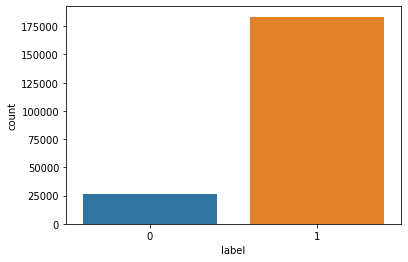

In [10]:
#countplot for my label and see i have imbalance data which will be used later on for upsampling
sns.countplot(df["label"])

In [11]:
#Counting Label
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

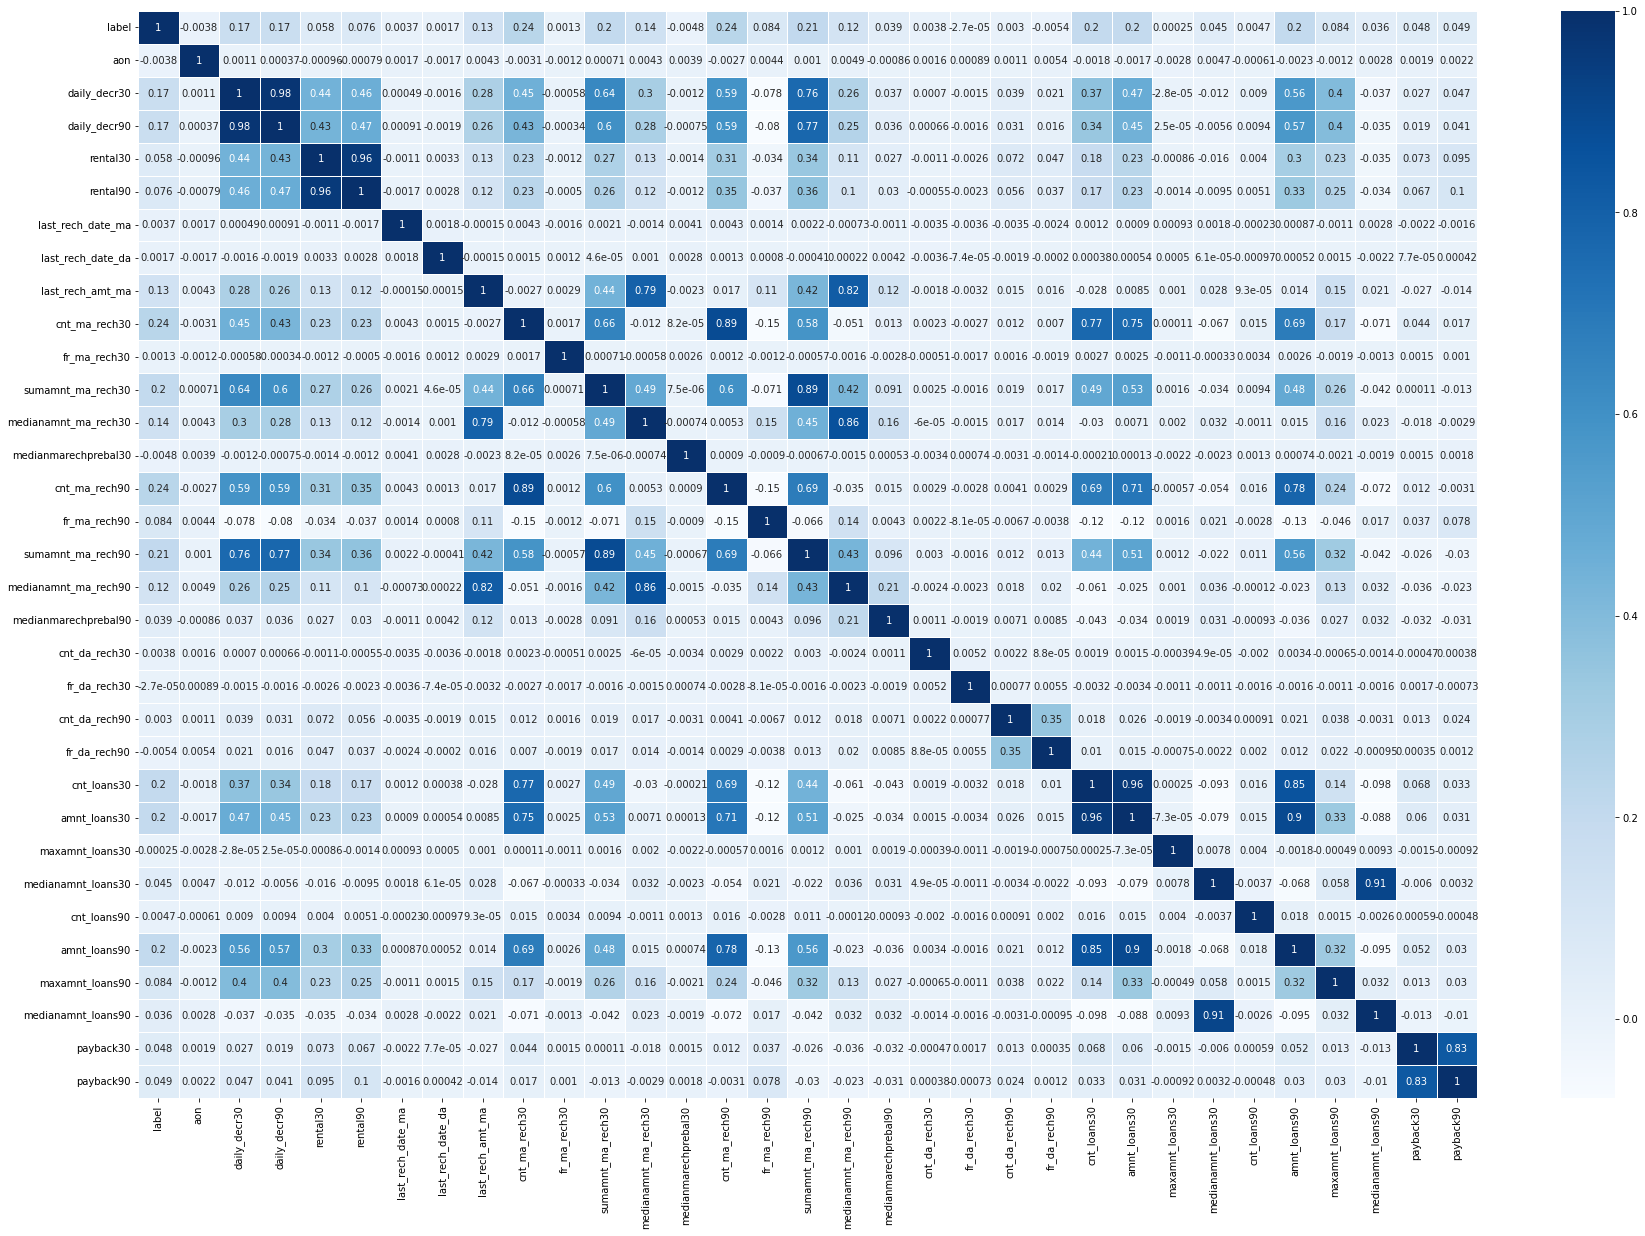

In [12]:
#Checking for strong correlation between features and label
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=1, robust=True)
plt.show()

In [13]:
#Dropping all my duplicates value
df.drop_duplicates(inplace=True)

In [14]:
#Shape of my dataset after drop
df.shape

(209592, 35)

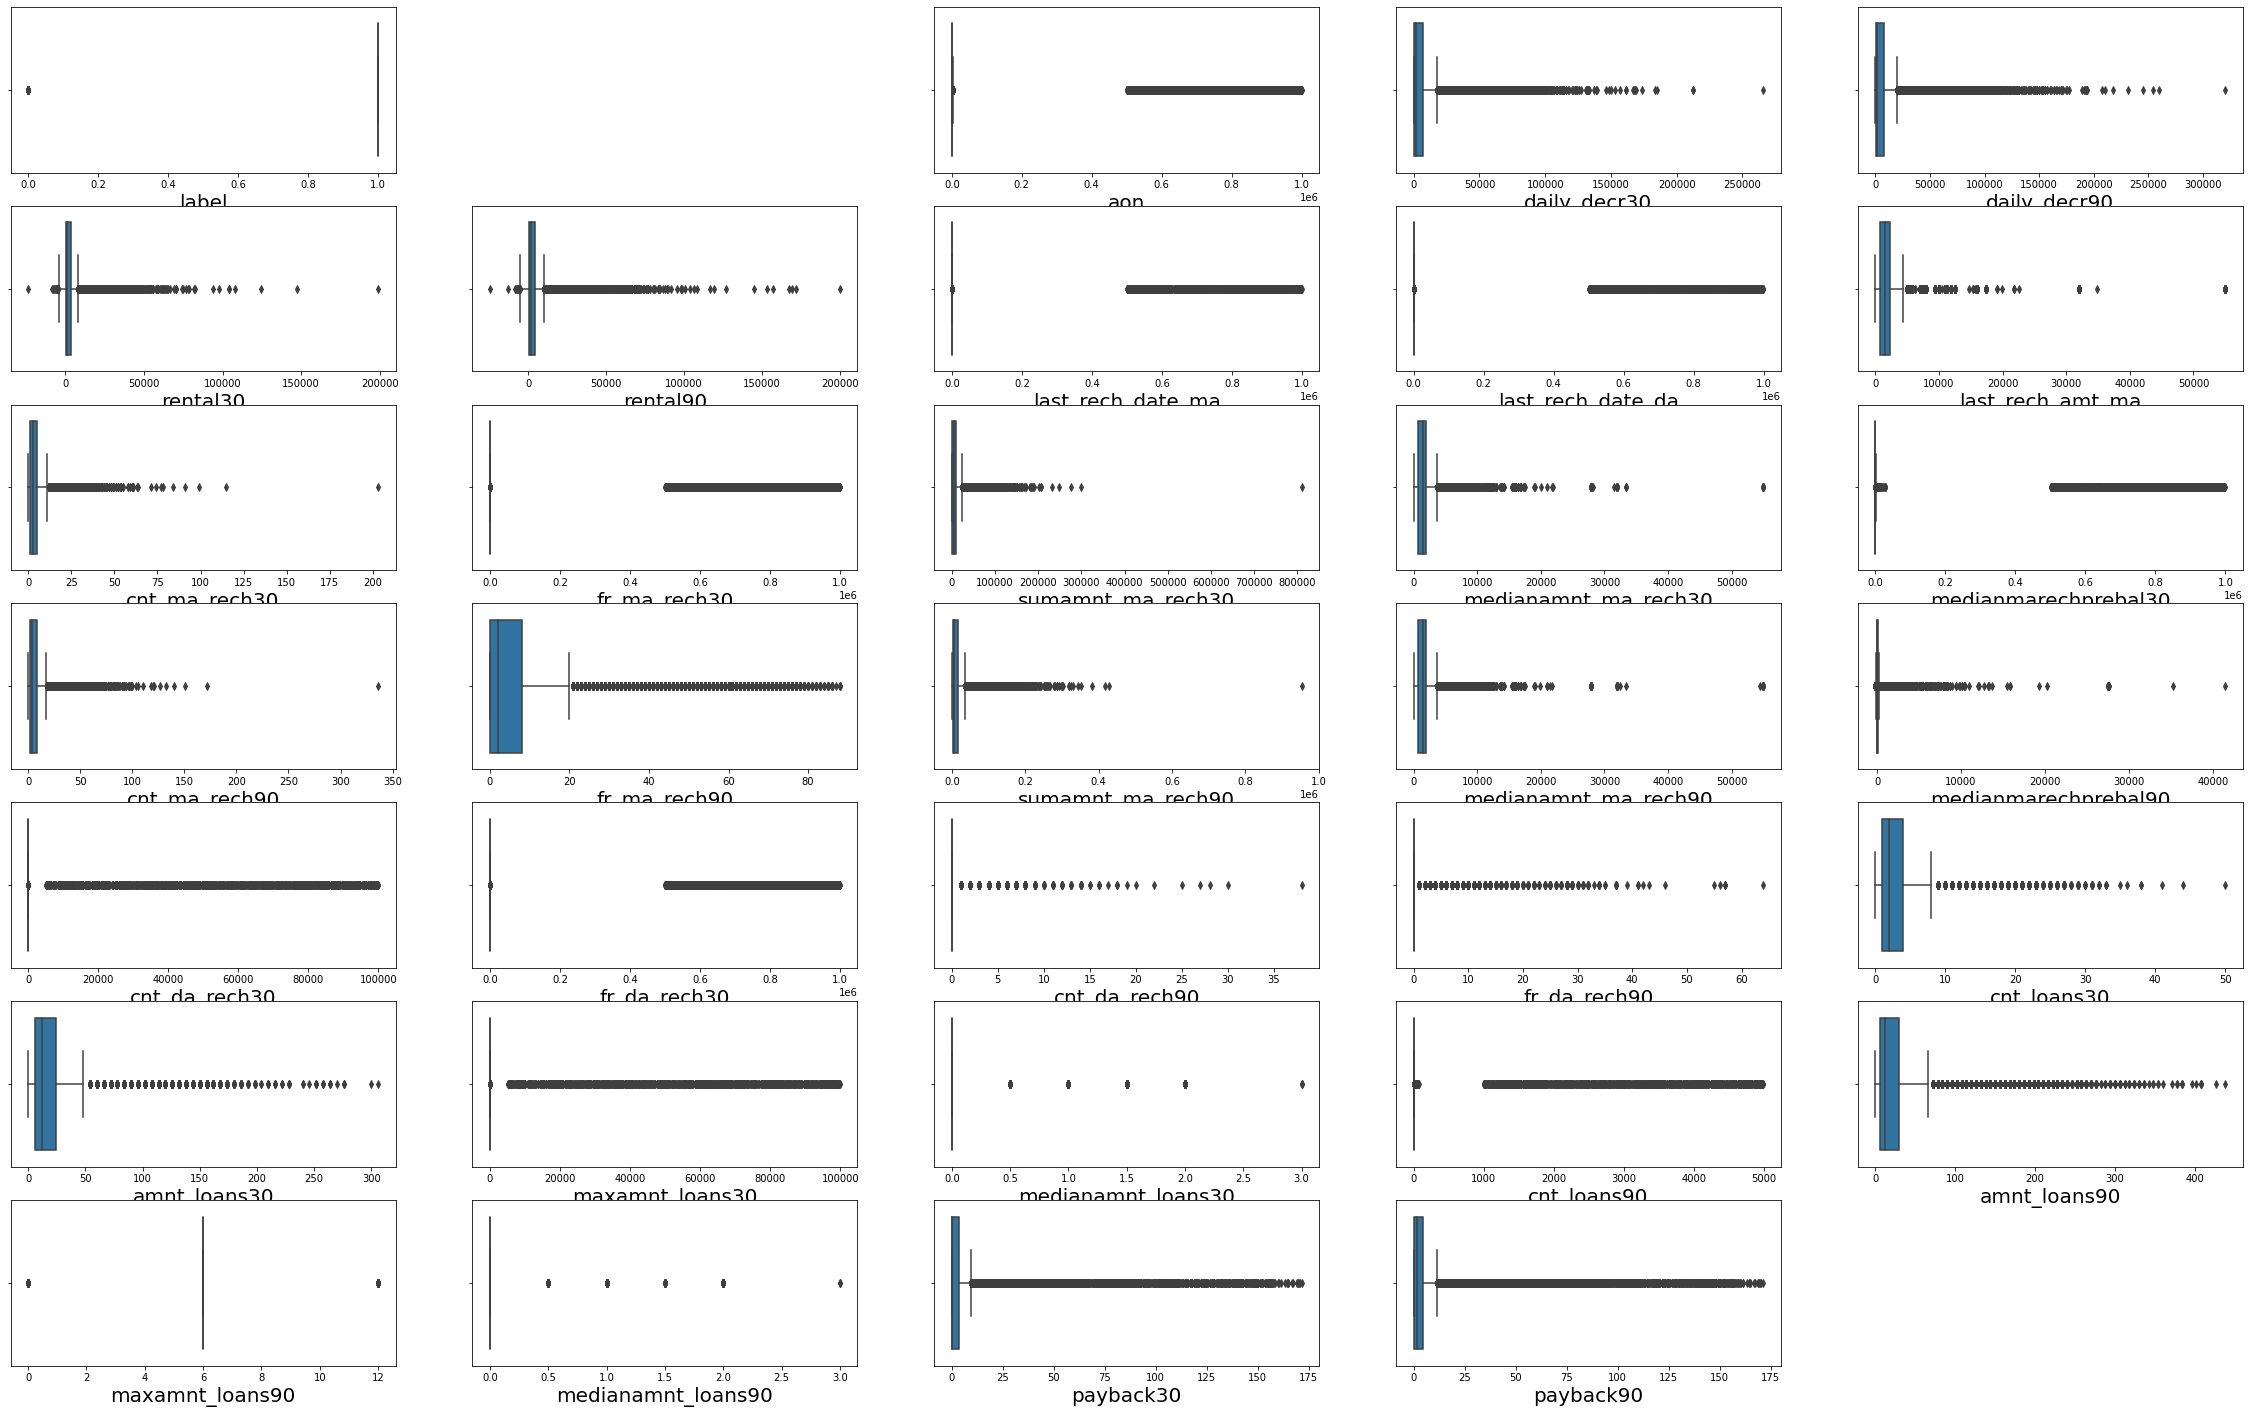

In [15]:
#plotting box plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=35:
            ax = plt.subplot(7,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [16]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
#encoding for my categorical variables so that it will covert to numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

ImportError: cannot import name 'logger' from 'joblib' (unknown location)

In [ ]:
#checking for Z score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

print(z)

index = (np.where(z>3)[0])

df = df.drop(df.index[index])

df.shape

In [ ]:
#plotting box plot for my dataframe after z score
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=35:
            ax = plt.subplot(7,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [ ]:
#skew check
df.skew()

In [ ]:
#Skewness removal
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [ ]:
df.describe()

In [ ]:
#Data Distribution after cleaning mydataset
plt.figure(figsize=(20,60))

for i, col in zip(range(len(df.columns)),df.columns):
    plt.subplot(10,5,i+1)
    sns.distplot(df[col], color='blue')
    plt.tight_layout()

In [ ]:
#Working on my label to handlance imbalance
plt.figure(figsize=(8,6))
print(df['label'].value_counts())
sns.countplot(df['label'].sort_values())

In [ ]:
non_defaulter=df[df.label==1]
defaulter=df[df.label==0]

In [ ]:
from sklearn.utils import resample

In [ ]:
default_sample=resample(defaulter, n_samples=len(non_defaulter))

In [ ]:
upsampled=pd.concat([non_defaulter,default_sample])

In [ ]:
#Data is balanced now
upsampled.label.value_counts()

In [ ]:
#Splitting my Label and features
xdata=upsampled.drop(columns=['label'])
xdata.head()

In [ ]:
#Scaling my features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
#Scaling my features
xdata=pd.DataFrame(columns=xdata.columns,
                   data=sc.fit_transform(xdata))

In [ ]:
ydata=upsampled.label
ydata.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting my data into test and train
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=32,stratify=ydata)

## Classification Model Buiding

In [ ]:
#Building my logsitic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logic_r = LogisticRegression() #Instantiate the LogisticRegression object
logic_r.fit(xtrain,ytrain) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = logic_r.predict(xtest) #Predict  

In [ ]:
#Metrics for my Logistic regression model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(ytest,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred)) #for classification report
print('->'*63)

In [ ]:
#Building my DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier() #Instantiate the DecisionTreeClassifier object
DT.fit(xtrain,ytrain) #Call the fit method of DecisionTreeClassifier to train the model or to learn the parameters of model
y_pred1 = DT.predict(xtest) #Predict  

In [ ]:
#Metrics for my DecisionTreeClassifier model
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred1)) #for confusion matrix
print('-'*40)
DT_accuracy = accuracy_score(ytest,y_pred1)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred1)) #for classification report
print('->'*63)

In [ ]:
#Building my GaussianNB model
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB() #Instantiate the GaussianNB object
NB.fit(xtrain,ytrain) #Call the fit method of GaussianNB to train the model or to learn the parameters of model
y_pred2 = NB.predict(xtest) #Predict  

In [ ]:
#Metrics for my GaussianNB model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred2)) #for confusion matrix
print('-'*40)
NB_accuracy = accuracy_score(ytest,y_pred2)
print('Accuracy of GaussianNB :{:.2f}'.format(NB_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred2)) #for classification report
print('->'*50)

## Ensemble Approach

In [ ]:
#Building my AdaBoostClassifier model
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier() #Instantiate the AdaBoostClassifier object
abc.fit(xtrain,ytrain) #Call the fit method of AdaBoostClassifier to train the model or to learn the parameters of model
y_pred3 = abc.predict(xtest) #Predict  

In [ ]:
#Metrics for my AdaBoostClassifier model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred3)) #for confusion matrix
print('-'*40)
abc_accuracy = accuracy_score(ytest,y_pred3)
print('Accuracy of AdaBoostClassifier :{:.2f}'.format(abc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred3)) #for classification report
print('->'*50)

In [ ]:
#Building my  GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier() #Instantiate the GradientBoostingClassifier object
gbc.fit(xtrain,ytrain) #Call the fit method of GradientBoostingClassifier to train the model or to learn the parameters of model
y_pred4 = gbc.predict(xtest) #Predict  

In [ ]:
#Metrics for my GradientBoostingClassifier model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred4)) #for confusion matrix
print('-'*40)
gbc_accuracy = accuracy_score(ytest,y_pred4)
print('Accuracy of GradientBoostingClassifier :{:.2f}'.format(gbc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred4)) #for classification report
print('->'*50)

In [ ]:
#Building my BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier() #Instantiate the BaggingClassifier object
bc.fit(xtrain,ytrain) #Call the fit method of BaggingClassifier to train the model or to learn the parameters of model
y_pred5 = bc.predict(xtest) #Predict  

In [ ]:
#Metrics for my BaggingClassifier model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred5)) #for confusion matrix
print('-'*40)
bc_accuracy = accuracy_score(ytest,y_pred5)
print('Accuracy of BaggingClassifier :{:.2f}'.format(bc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred5)) #for classification report
print('->'*50)

In [ ]:
#Building my ExtraTreesClassifier model
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier() #Instantiate the ExtraTreesClassifier object
etc.fit(xtrain,ytrain) #Call the fit method of ExtraTreesClassifier to train the model or to learn the parameters of model
y_pred6 = etc.predict(xtest) #Predict  

In [ ]:
#Metrics for my ExtraTreesClassifier model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred6)) #for confusion matrix
print('-'*40)
etc_accuracy = accuracy_score(ytest,y_pred6)
print('Accuracy of ExtraTreesClassifier :{:.2f}'.format(etc_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred6)) #for classification report
print('->'*50)

In [ ]:
#Building my RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #Instantiate the RandomForestClassifier object
rf.fit(xtrain,ytrain) #Call the fit method of RandomForestClassifier to train the model or to learn the parameters of model
y_pred7 = rf.predict(xtest) #Predict

In [ ]:
#Metrics for my RandomForestClassifier model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred7)) #for confusion matrix
print('-'*40)
rf_accuracy = accuracy_score(ytest,y_pred7)
print('Accuracy of RandomForestClassifier :{:.2f}'.format(rf_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred7)) #for classification report
print('->'*50)


Below are the model accuracies which imlemented above without any hyper parameter, We will see now for which model should we be doing hyper Parameter before that we would do cross validation for all the models build.

Model Name Variable Accuracy

LogisticRegression logic_r 0.77

DecisionTreeClassifier DT 0.95

GaussianNB NB 0.75

AdaBoostClassifier abc 0.80

GradientBoostingClassifier gbc 0.83

BaggingClassifier bc 0.96

ExtraTreesClassifier etc 0.98

RandomForestClassifier rf 0.98

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for Linear regression
a =cross_val_score(logic_r,xdata,ydata,cv=5).mean()
b = LR_accuracy

b-a

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for Decision Tree
a =cross_val_score(DT,xdata,ydata,cv=5).mean()
b = DT_accuracy

b-a#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for GaussianNB
a =cross_val_score(NB,xdata,ydata,cv=5).mean()
b = NB_accuracy

b-a

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for AdaBoostClassifier
a =cross_val_score(abc,xdata,ydata,cv=5).mean()
b = abc_accuracy

b-a

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for GradientBoostingClassifier
a =cross_val_score(gbc,xdata,ydata,cv=5).mean()
b = gbc_accuracy

b-a

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for BaggingClassifier
a =cross_val_score(bc,xdata,ydata,cv=5).mean()
b = bc_accuracy

b-a

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for ExtraTreesClassifier
a =cross_val_score(etc,xdata,ydata,cv=5).mean()
b = etc_accuracy

b-a

In [ ]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score

#Cross Validation  for RandomForestClassifier
a =cross_val_score(rf,xdata,ydata,cv=5).mean()
b = rf_accuracy
 
b-a

## Inferences

 Based on the above cross validation and the model accuracy i see random forest is leading for the model performance lets try hyper parameter tuning for the same and try to increase model performance from 98%

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(xtrain,ytrain)

In [ ]:
print(g_search.best_params_)

In [ ]:
#Building my RandomForestClassifier model with bes param chosen from hyper parameter using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(bootstrap=True,max_depth=None,max_features='log2',n_estimators=15) #Instantiate the RandomForestClassifier object
rf1.fit(xtrain,ytrain) #Call the fit method of RandomForestClassifier to train the model or to learn the parameters of model
y_pred8 = rf1.predict(xtest) #Predict  

In [ ]:
#Metrics for my RandomForestClassifier model
print('\033[1m''->'*50)
print('\033[1m''Confusion Matrix\n',confusion_matrix(ytest,y_pred8)) #for confusion matrix
print('-'*40)
rf1_accuracy = accuracy_score(ytest,y_pred8)
print('Accuracy of RandomForestClassifier :{:.2f}'.format(rf1_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(ytest,y_pred8)) #for classification report
print('->'*50)

# Conclusion

By Using Hyperparameter i get less accuracy so i have chosen for the defautl random forest model as best and the same has been saved as pkl

In [ ]:
#Saving the model in pkl file
import joblib
joblib.dump(rf,"micro_credit_loan.pkl")

model = joblib.load("micro_credit_loan.pkl")

#Predicting the saved model
prediction = model.predict(xtest)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("micro_credit_loan.csv",index=False)